Noms et prénoms des membres du groupe:

-

# Vision industrielle - TP noté

### Exécuter la cellule suivante afin de charger l'ensemble des outils et fonctions nécessaires

In [3]:
from IPython.core.display import HTML
from functools import partial
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib notebook

import imageio
import skimage.morphology
import skimage.segmentation
import skimage.feature
import skimage.data
#import cv2

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.max_open_warning'] = 100
plt.rcParams['figure.figsize'] = 2, 2

def format_coord(x, y, image):
    x = int(x + 0.5)
    y = int(y + 0.5)
    try:
        val = str(image[y, x])
    except IndexError:
        val = "?"
    return "color={} @ [{}, {}]".format(val, y, x)

def display_image_nb(image, title='', cmap=None):
    fig, ax = plt.subplots(1,1)
    if cmap is None:
        ax.matshow(image)
    else:
        ax.matshow(image, cmap=cmap)
    ax.set_xlabel(title)
    ax.format_coord = partial(format_coord, image=image)
    #return fig, ax

def display_image_color(image, title=''):
    fig, ax = plt.subplots(1,1)
    ax.imshow(image)
    ax.set_xlabel(title)
    ax.format_coord = partial(format_coord, image=image)
    #return fig, ax

def display_image_color_opencv(image, title=''):
    fig, ax = plt.subplots(1,1)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_xlabel(title)
    ax.format_coord = partial(format_coord, image=image)
    
def draw_rectangle(y1, x1, y2, x2, color='red', ax=None, alpha=1):
    """ Add a rectangle on an image """
    if ax is None:
        ax = plt.gca()
    rect = mpatches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              fill=False, edgecolor=color, linewidth=2, alpha=alpha)
    ax.add_patch(rect)

print("OK let's go")


OK let's go


# Exercice 1: Trouver les différences

Compléter le code suivant afin de trouver les différences entre les deux images img_nb_1, img_nb_2


<IPython.core.display.Javascript object>


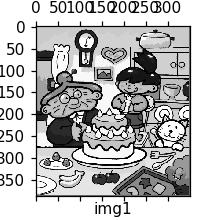

<IPython.core.display.Javascript object>


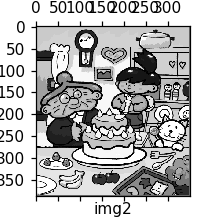

In [3]:
# chargement des images
img_nb_1 = imageio.imread('./images/spot_diff_1.png')
img_nb_2 = imageio.imread('./images/spot_diff_2.png')
display_image_nb(img_nb_1, title='img1')
display_image_nb(img_nb_2, title='img2')


- Calculer la différence entre **img_nb_1** et **img_nb_2**:

In [ ]:
img_diff =

- Afficher l'image des différences

- Calculer le masque binaire correspondant aux positions où une différence a été détectée (le masque doit valoir **True** là où une différence a été détectée)
- Afficher ce masque

In [ ]:
mask = 

# afficher le masque : 



- Utiliser une opération morphologique afin de regrouper les régions du masque ayant des valeurs à True (i.e il s'agit ici d'enlever les trous dans les zones blanches)

In [ ]:
import skimage.morphology

new_mask = 

Afficher l'image original, et dessiner un rectange autour des zones dans lesquelles il y a eu une différence.

Aide: le code est quasiment similaire à celui du tp1

- Combien de différences présentent les deux images

# Exercice 2: Où est charlie ?



In [ ]:
scene_image = cv2.imread("./images/waldo1.jpg")
display_image_color_opencv(scene_image)

In [ ]:
obj_image = cv2.imread("./images/waldo_obj.png")
display_image_color_opencv(obj_image)

Utilisez les méthodes opencv suivante afin de trouver Charlie (i.e l'image obj_image) dans l'image scene_image:

    - cv2.minMaxLoc (cf doc opencv)
    - cv2.MatchTemplate (cf doc opencv + google)


Utilisez les méthodes suivantes afin de faire ressortir la partie de l'image contenant charlie que vous avez trouvé à la question précédente:

    - cv2.addWeighted (cf doc opencv)
    - les mask numpy (cf tp1)

# Exercice 3: Reconnaissance de caracteres (APPLICATION)

Nous allons réutiliser dans cette section un classifieur similaire a celui entrainé lors du tp2.

Dans un premier temps, réentrainez un classifieur sur le dataset digits


In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import sklearn.neighbors

digits = ???
X = ???
Y = ???

classifier = ???


Vous allez extraire les digits de l'image suivante:


/home/lgeorge/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


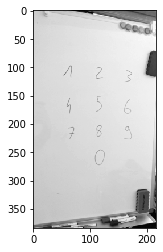

In [4]:
image = imageio.imread('../data/digits.jpg')
from skimage.transform import rescale, resize, downscale_local_mean
res = rescale(image, 0.1, anti_aliasing=True)
res = skimage.color.rgb2gray(res)
display_image_color(res)

- decouper la zone qui nous interesse (centre du tableau), et creer une nouvelle image

- utiliser des methodes de traitements d'images pour isoler chaque digit

Vous pouvez le faire vous meme en utisant un seuil a 0.6 par exemple, ou alors utiliser un des filtres disponnible dans skimage:
    
    https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html
        

Utilisez une operation de morphologie vue au tp1 afin de boucher les trous

Vous devriez obtenir une image de ce type:

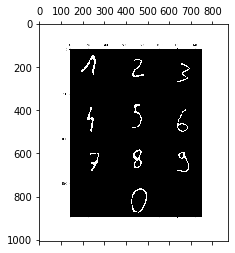

In [5]:
display_image_nb(imageio.imread('../data/result_expected.png'))

utilisez skimage measure.label puis skimage.measure.regionprop pour trouver les differentes regions de l'image.

les champs .area et .bbox vous serons utile ici.

Utilisez la fonction suivante pour extraire les prediction, expliquez chacune des lignes de cette fonction

In [ ]:
my_new_images = []
for bbox in boxes:
    sub_image = image_crop[bbox[0]:bbox[2], bbox[1]:bbox[3]]
    new_image = resize(np.uint8(sub_image*255), (8,8), anti_aliasing=True)
    new_image = new_image / np.max(new_image) * 16
    classifier_input = [np.array(new_image.flatten(), dtype=np.uint8).astype(np.float64)]
    prediction = classifier.predict(classifier_input)
    display_image_nb(new_image, title=str(prediction))

Que pensez vous du résultat ?


[bonus] Recommencez avec des digits que vous aurrez écrit sur un papier et pris en photo


# Exercice 4: Détection de chat

Utiliser le détecteur d'opencv cv2.CascadeClassifier avec le jeux d'apprentissage /root/anaconda3/share/OpenCV/haarcascades/haarcascade_frontalcatface_extended.xml

afin de détecter les chat dans l'image suivante

In [ ]:
img = imageio.imread('./images/cat3.jpg')
display_image_color(img)

Expliquez en vous basant sur ce que vous avez lors de ce cours comment ce détecteur a t'il été entrainé.


Ecrivez le code necessaire afin de compter le nombre de chat présent dans une image, tester votre code sur quelques images.

# Fin

Merci d'envoyer votre tp à Laurent.f.george@ gmail. com.

(File->print_preview, puis enregistrer_sous).